In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
data.isnull().any() # Checking the Null Values

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
dtype: bool

## Data Visualization

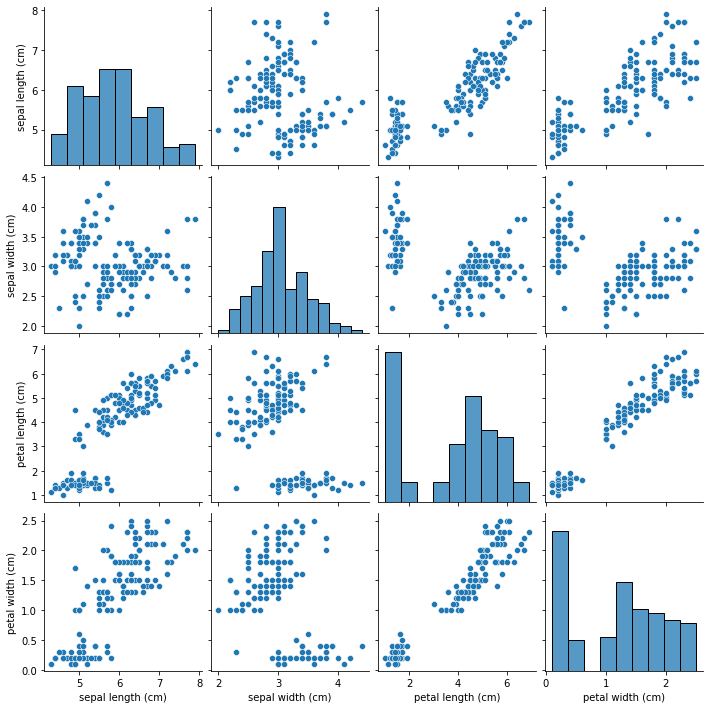

In [5]:
sns.pairplot(data)

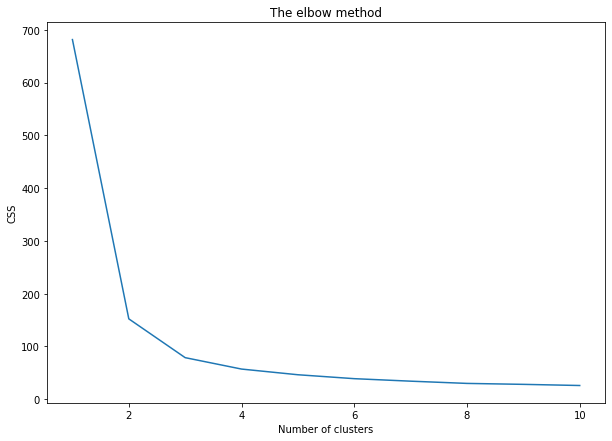

In [6]:
x = data.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
css = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                   max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    css.append(kmeans.inertia_)
plt.figure(figsize=[10, 7])
plt.plot(range(1, 11), css)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('CSS')
plt.show()

In [7]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
               max_iter = 300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)

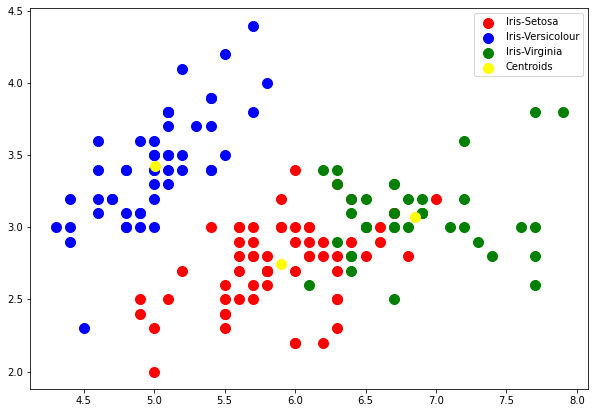

In [8]:
plt.figure(figsize=[10, 7])
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0,1],
           s= 100, c = 'red', label="Iris-Setosa")
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1,1],
           s= 100, c = 'blue', label="Iris-Versicolour")
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2,1],
           s= 100, c = 'green', label="Iris-Virginia")

plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:,1],
           s =100, c='yellow', label ='Centroids')
plt.legend()

## Conclusion
Therefore, We can Predict the Number of Cluster and Visualize it using Scatter Plot.